In [3]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math 


In [13]:
!pip install missingno

In [4]:
#Loading test and train datasets
df_test = pd.read_csv('kc_house_data_test_features.csv', index_col=0)
df_train = pd.read_csv('kc_house_data_train.csv', index_col=0)

In [5]:
df_trainc = df_train.copy()

In [22]:
pd.set_option('display.max_columns', None)
df_trainc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [14]:
import missingno as msno

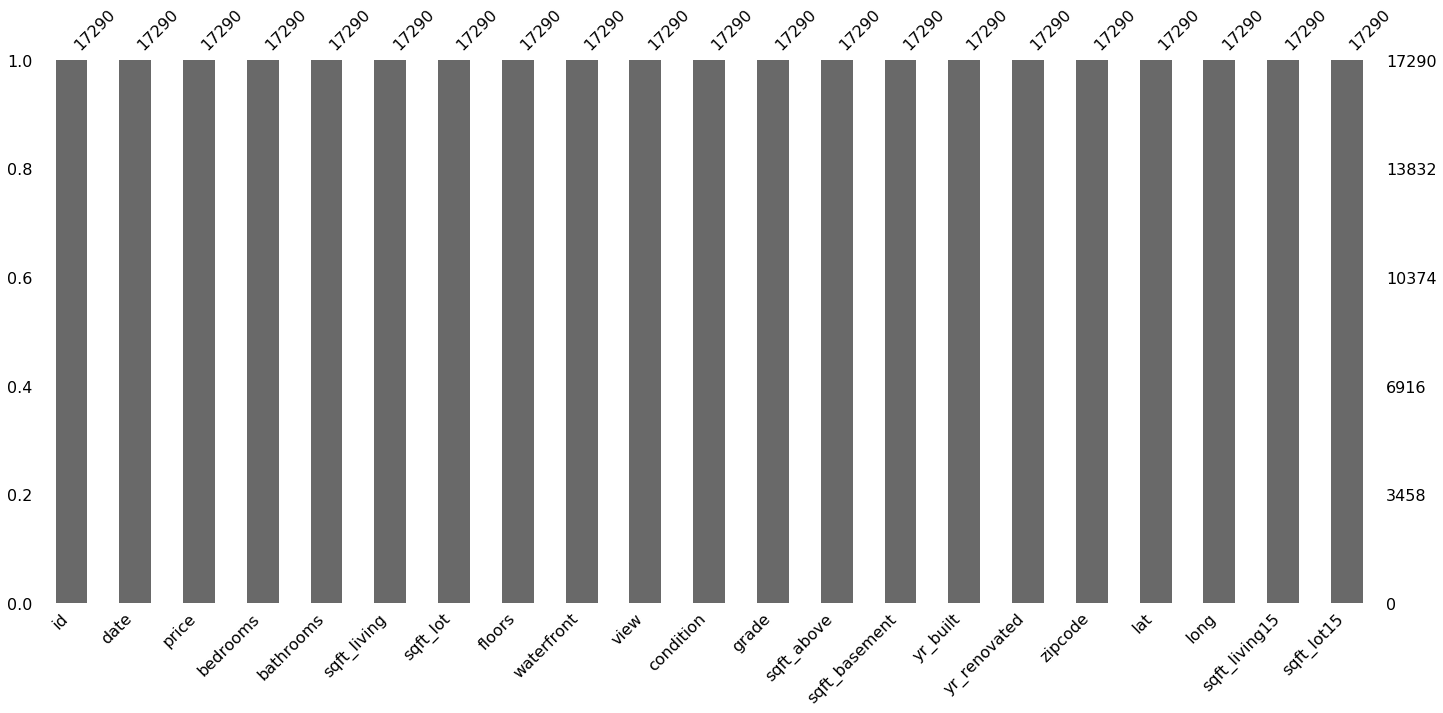

In [17]:
# Visualizing missing values
msno.bar(df_trainc)

In [29]:
df_trainc.loc[(df_trainc['bathrooms'] == 0) | (df_trainc['bedrooms'] == 0)].shape
# there are 14 rows that are true to this condition. since no house can have 0
# bedrooms or 0 bathrooms, we will have to find a way to impute of remove.
#considering the large sample, removing the 14 rows may be a very small price to pay
# for missing values

(14, 21)

In [19]:
df_trainc['bathroom']

0        0
1        0
2        0
3        0
4        0
        ..
17285    0
17286    0
17287    0
17288    0
17289    0
Name: bathroom, Length: 17290, dtype: int64

In [1]:
# df_trainc.plot(kind="scatter", x="long", y="lat", alpha=0.05, figsize = (10, 10), s = 1, \
#                c = 'price', cmap=plt.get_cmap("jet"), colorbar=False)

In [53]:
zipcode= list(df_trainc['zipcode'].unique())

In [82]:
house_count = {}

In [80]:
# for key, value in house_count_dict.items():
#     print(key)
values = list(df_trainc['zipcode'].value_counts().values)
keys = list(df_trainc['zipcode'].value_counts().index)

In [83]:
house_count = dict(zip(keys, values))
         

In [110]:
# df_trainc['num_houses_in_zip'] = 
num_houses = []
for key, value in house_count.items():
    for x in df_trainc['zipcode']:
        if x == key:
            num_houses.append(value)
df_trainc['num_houses_in_zip'] = num_houses
df_trainc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,num_houses_in_zip
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,474
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,474
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,474
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,474
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,474


In [112]:
df_trainc['price'].corr(df_trainc['num_houses_in_zip'])

0.012501068613778607

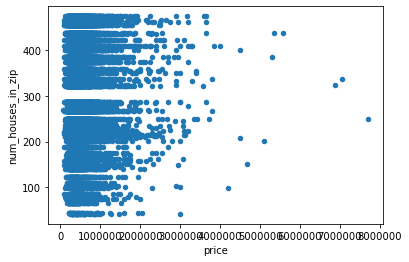

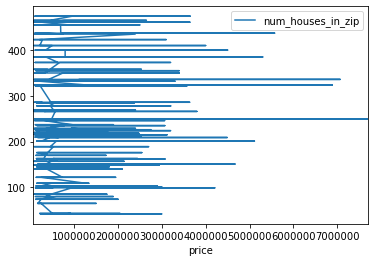

In [121]:
df_trainc.plot.scatter(x ='price', y = 'num_houses_in_zip')
df_trainc.plot(x ='price', y = 'num_houses_in_zip')

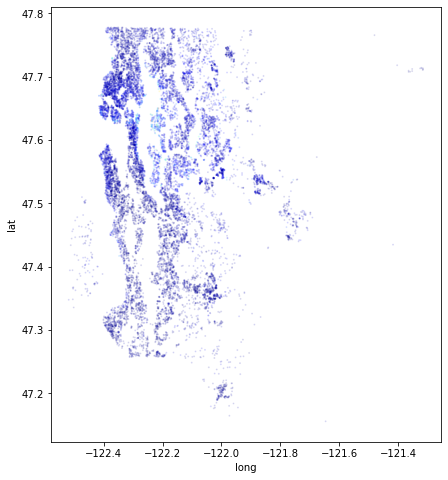

In [117]:
df_trainc.plot(kind="scatter", x="long", y="lat", alpha=0.1, figsize = (7,8), \
               s = 1, \
               c = df_trainc['price'], cmap=plt.get_cmap("jet"), colorbar=False)
# the prices go up when you go from south to north. latitude is a better indicator of location for signaling changes in house values

Possible new values:
1. bathroom/bedroom --- no correlation to price
2. bathroom/ floor --- corr to price is 0.2402
3. bathroom/ sqft-living --- corr to price is -0.2655. *Does this make sense? I think not*
4. Age of the house using yr-built --- corr to price is -0.05645. Not very correlated with price
5. sqft_living/sqft_above to check on the proportion of usable space --- 0.1093 
6. (sqft_above + sqft_basement)/ floor to get avg sqftage per floor --- 0.4334
7. sqft_lot - sqft/floor to get outside open space --- 0.08
8. sqft_living - sqft_above does the house have other spaces under the roof --- 0.3233 

In [11]:
# Possible value 1
df_trainc['bath_per_bed'] = df_trainc['bathrooms']/ df_trainc['bedrooms']
df_trainc['bath_per_bed'].corr(df_trainc['price'])

nan

In [13]:
#Possible value 2
df_trainc['bath_per_flr'] = df_trainc['bathrooms']/ df_trainc['floors']
df_trainc['bath_per_flr'].corr(df_trainc['price'])

0.2402247836266884

In [14]:
#Possible value 3
df_trainc['bath_per_sqftliv'] = df_trainc['bathrooms'] / df_trainc['sqft_living']
df_trainc['bath_per_sqftliv'].corr(df_trainc['price'])

-0.26553449120323264

In [19]:
#Possible value 4
df_trainc['age'] = 2020 - df_trainc['yr_built']
df_trainc['age'].corr(df_trainc['price'])
df_trainc['age'].min()

5

In [23]:
# Possible value 5
df_trainc['use_prop'] = df_trainc['sqft_living']/ df_trainc['sqft_above']
df_trainc['use_prop'].corr(df_trainc['price'])

0.10931138830051744

In [25]:
# Possible value 6
df_trainc['sqft_per_floor'] = (df_trainc['sqft_above'] + df_trainc['sqft_basement'])/df_trainc['floors']
df_trainc['sqft_per_floor'].corr(df_trainc['price'])

0.4334523536578237

In [27]:
#Possible value 7
df_trainc['outside_space'] = df_trainc['sqft_lot'] - df_trainc['sqft_per_floor']
df_trainc['outside_space'].corr(df_trainc['price'])

0.08025236212208992

In [29]:
#Possible value 8
df_trainc['other_space'] = df_trainc['sqft_living'] - df_trainc['sqft_above']
df_trainc['other_space'].corr(df_trainc['price'])
# this could also be a dummy

0.32331176808688505